In [25]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import os
plt.style.use('seaborn')
%matplotlib inline

In [40]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B"

    
def retrieve_freemont_data(filename=filename, url=URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    # Check filename
    !head "freemont.csv"
    data = pd.read_csv('freemont.csv', delimiter=';', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

In [45]:
filename = "freemont.csv"
data = retrieve_freemont_data(filename=filename, url=URL)

data.head()

﻿Date;Fremont Bridge West Sidewalk;Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM;4;9
10/03/2012 01:00:00 AM;4;6
10/03/2012 02:00:00 AM;1;1
10/03/2012 03:00:00 AM;2;3
10/03/2012 04:00:00 AM;6;1
10/03/2012 05:00:00 AM;21;10
10/03/2012 06:00:00 AM;105;50
10/03/2012 07:00:00 AM;257;95
10/03/2012 08:00:00 AM;291;146


,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


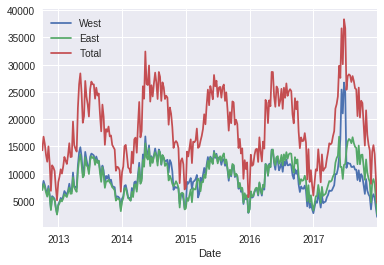

In [44]:
# Using pandas inbuilt plotting
data.resample('W').sum().plot()

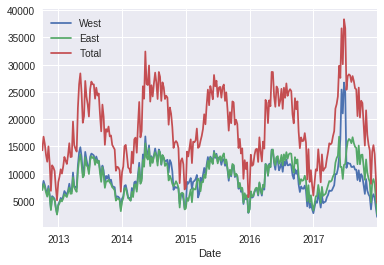

In [47]:
# Using matplotlib seaborn style
data.columns = ['West', 'East','Total']
data.resample('W').sum().plot();

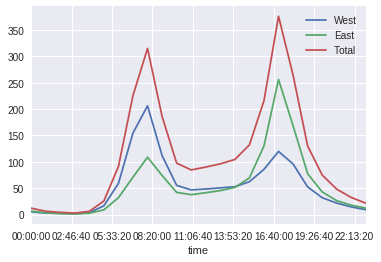

In [48]:
data.groupby(data.index.time).mean().plot();

In [54]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


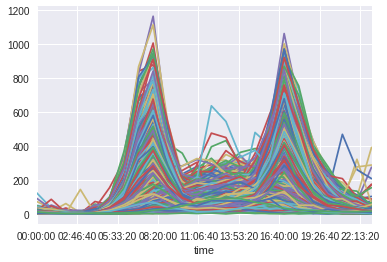

In [56]:
pivoted.plot(legend=False, alpha=0.01)

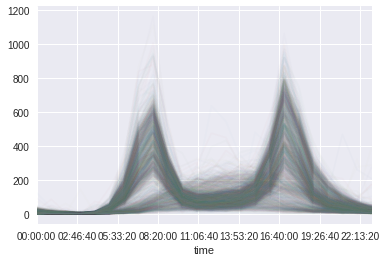

In [59]:
pivoted.plot(legend=False, alpha=0.02)